### Pandas 란?
데이터 처리와 분석에 최적화된 라이브러리
- 행과 열(테이블 형태)로 이루어진 데이터 객체를 만들어 다룰 수 있음
- 빅데이터를 처리하고 분석하는데 편리한 함수들을 제공

### Pandas 구조
- Series : 1차원 데이터들의 집합(index + value)
- DataFrame : 2차원 행과 열로 이루어진 표 형태의 데이터 집합(1차원의 Series가 모여서 DF를 이룸)

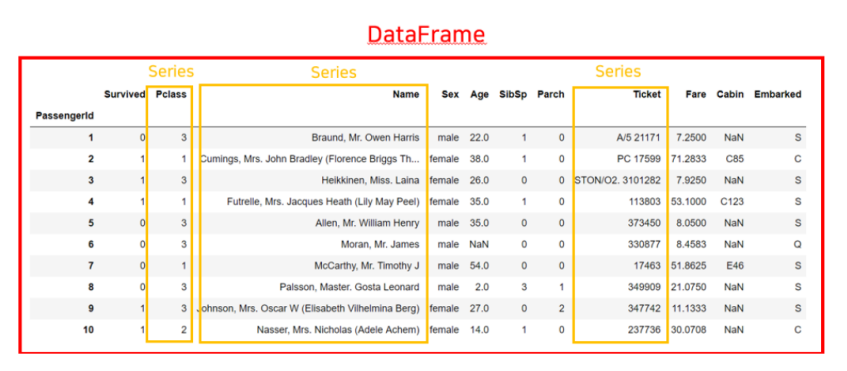

### Pandas 라이브러리 불러오기

In [1]:
import pandas as pd

#### Series 생성
- 각 도시들의 인구수를 Series로 만들어보자!

In [2]:
# 인덱스를 따로 설정하지 않으면 좌측에 자동으로 인덱스 번호가 0번부터 생성됨
population = pd.Series([9904312,3448737, 2890451, 2466052])
population

0    9904312
1    3448737
2    2890451
3    2466052
dtype: int64

#### 인덱스를 지정하여 Series 생성

In [3]:
population = pd.Series([9904312,3448737, 2890451, 2466052], index=['서울','부산','인천','대구'])
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [4]:
# 딕셔너리 형태로 Series 생성
population = pd.Series({"서울":9904312,"부산":3448737, "인천":2890451, "대구":2466052})
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

#### Series 이름, 인덱스 이름 지정

In [5]:
# Series 이름 설정
population.name = "인구"
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [6]:
# index 이름 설정
population.index.name = "도시"
population

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [7]:
# index 변경하기
population.index = ["1","2","3","4"]
population

1    9904312
2    3448737
3    2890451
4    2466052
Name: 인구, dtype: int64

In [8]:
population = pd.Series([9904312,3448737, 2890451, 2466052], index=['서울','부산','인천','대구'])
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

#### Series 데이터 갱신, 추가, 삭제

In [9]:
# 데이터 갱신
population['부산']=3500000
population

서울    9904312
부산    3500000
인천    2890451
대구    2466052
dtype: int64

In [10]:
# 데이터 추가
population['대전'] = 2400000
population

서울    9904312
부산    3500000
인천    2890451
대구    2466052
대전    2400000
dtype: int64

In [11]:
# 데이터 삭제
del population["서울"]
population

부산    3500000
인천    2890451
대구    2466052
대전    2400000
dtype: int64

#### DataFrame 생성

In [12]:
# 딕셔너리를 이용해서 생성하기!
data = {'2015':[9904312, 3448737, 2890451, 2466052],
       '2010':[9631482, 3393191, 2632035, 2431774]}

In [13]:
population_df = pd.DataFrame(data)
population_df
# Series와는 달리 key값이 컬럼명으로 들어감(Series에서는 key값이 index)

2015     2010
0  9904312  9631482
1  3448737  3393191
2  2890451  2632035
3  2466052  2431774

In [14]:
# 리스트를 이용하여 생성하기!
data = [[9904312, 3448737, 2890451, 2466052],
        [9631482, 3393191, 2632035, 2431774]
       ]
ind = ['2015','2010']
col = ['서울', '부산', '인천', '대구']

In [15]:
population_df2 = pd.DataFrame(data, index =ind, columns = col)
population_df2

서울       부산       인천       대구
2015  9904312  3448737  2890451  2466052
2010  9631482  3393191  2632035  2431774

#### 정리
- DF를 생성하는 방법은 2가지(딕셔너리 방식, 리스트 방식)
- 딕셔너리 방식은 값이 위에서 아래로 들어가고, 리스트 방식은 보이는 위치에 그대로 들어감

In [16]:
# .T : DF의 행과 열을 반대로 출력(역행렬, 전치)
population_df2 = population_df2.T
population_df2

2015     2010
서울  9904312  9631482
부산  3448737  3393191
인천  2890451  2632035
대구  2466052  2431774

#### DF에 새로운 컬럼 추가하기

In [17]:
# 기존 DF에 없는 컬럼명을 대괄호 안에 넣어주고 값들을 대입해줌
population_df2['2005'] = [9762546, 3512547, 2517680, 2456016]
population_df2

2015     2010     2005
서울  9904312  9631482  9762546
부산  3448737  3393191  3512547
인천  2890451  2632035  2517680
대구  2466052  2431774  2456016

#### 컬럼 삭제

In [18]:
del population_df2['2005']
population_df2

2015     2010
서울  9904312  9631482
부산  3448737  3393191
인천  2890451  2632035
대구  2466052  2431774

In [19]:
population_df2['2005'] = [9762546, 3512547, 2517680, 2456016]
population_df2

2015     2010     2005
서울  9904312  9631482  9762546
부산  3448737  3393191  3512547
인천  2890451  2632035  2517680
대구  2466052  2431774  2456016

#### 행 or 열 삭제

In [20]:
# axis의 기본값은 0이며 행을 삭제함
# axis = 1이면 열을 삭제
# inplace=True : 변경된 사하을 변수에 바로 적용시키는 명령
population_df2.drop('2005', axis=1, inplace=True)
population_df2

2015     2010
서울  9904312  9631482
부산  3448737  3393191
인천  2890451  2632035
대구  2466052  2431774

#### 정리
- del은 컬럼(열) 삭제
- drop은 행, 열 방향 삭제(방향 설정 필요, axis =0: 행,  axis=1: 열

 #### DF의 속성 확인
 - 형태, 값, 인덱스, 컬럼명 확인

In [21]:
# DF의 형태 확인하기
# numpy의 배열과 같음
population_df2.shape

(4, 2)

In [22]:
# DF 내의 데이터 값만 추출하기
population_df2.values

array([[9904312, 9631482],
       [3448737, 3393191],
       [2890451, 2632035],
       [2466052, 2431774]], dtype=int64)

In [23]:
# DF의 인덱스 확인
population_df2.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [24]:
# DF의 컬럼명 확인
population_df2.columns

Index(['2015', '2010'], dtype='object')

In [25]:
data = {"홍길동":[175.3,66.2,27.0], "김사또":[180.2,78.9,49.0], "임꺽정":[178.6,55.1,35.0]}
col = ["키", "몸무게", "나이"]

In [26]:
df1 = pd.DataFrame(data, index=col)
df1

홍길동    김사또    임꺽정
키    175.3  180.2  178.6
몸무게   66.2   78.9   55.1
나이    27.0   49.0   35.0

In [27]:
df2 = df1.T
df2

키   몸무게    나이
홍길동  175.3  66.2  27.0
김사또  180.2  78.9  49.0
임꺽정  178.6  55.1  35.0

#### Pandas 연산

- Series 연산

In [28]:
population = pd.Series([9904312, 3448737, 2890451, 2466052],
                       index=['서울', '부산', '인천', '대구']
                      )
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [29]:
population2 = pd.Series([9631482, 3393191, 2632035, 2431774],
                        index=['서울', '부산', '인천', '대전']
                       )
population2

서울    9631482
부산    3393191
인천    2632035
대전    2431774
dtype: int64

In [30]:
population/1000000

서울    9.904312
부산    3.448737
인천    2.890451
대구    2.466052
dtype: float64

In [31]:
population - population2

대구         NaN
대전         NaN
부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

#### 정리
 - 인덱스가 다른 DF끼리는 값이 생성되지 않음
 - Nan(Not a number) : 정해지지 않고 비어있는 값

### Pandas에서 데이터 접근을 위한 인덱싱, 슬라이싱
- 인덱스 번호로 접근 : 0부터 시작
- 인덱스 명으로 접근
- loc, iloc 인덱서 접근 : loc(인덱스 문자), iloc(인덱스번호)
- 불리언 인덱싱 : True, False값을 활용하여 조건에 맞는 데이터만 출력

In [32]:
score = pd.Series({'java':70, 'python':95, 'html/css':80, 'ML':82})
score

java        70
python      95
html/css    80
ML          82
dtype: int64

In [33]:
# 인덱스 번호로 접근
score[1]

95

In [34]:
# 인덱스 명으로 접근
score['python']

95

In [35]:
# 인덱스 명칭 자체에 접근하고 싶을 때
score.index[1]

'python'

#### Series 슬라이싱

In [36]:
# python부터 ML까지 인덱스 번호로 접근
score[1:]
# 범위를 지정해주면 Series 전체에 접근하기 때문에 인덱스명까지 같이 출력됨

python      95
html/css    80
ML          82
dtype: int64

In [37]:
# 데이터 값에만 접근
score.values[1:]

array([95, 80, 82], dtype=int64)

In [38]:
# 인덱스에만 접근
score.index[1:]

Index(['python', 'html/css', 'ML'], dtype='object')

In [39]:
# 인덱스 명으로 접근
score['python':'ML']

python      95
html/css    80
ML          82
dtype: int64

#### DF인덱싱, 슬라이싱

In [40]:
# 데이터 로드
score_data = pd.read_csv('data/score.csv', encoding="euc-kr", index_col="과목")
score_data

1반  2반  3반  4반
과목                
수학  45  44  73  39
영어  76  92  45  69
국어  47  92  45  69
사회  92  81  85  40
과학  11  79  47  26

- DF 열(컬럼) 인덱싱

In [41]:
# 1반 컬럼에 접근
score_data['1반']

과목
수학    45
영어    76
국어    47
사회    92
과학    11
Name: 1반, dtype: int64

In [42]:
score_data[['1반']]

1반
과목    
수학  45
영어  76
국어  47
사회  92
과학  11

In [43]:
# 두 개 이상의 컬럼 인덱싱(반드시 []를 두개 써줘야함!)
score_data[['1반', '3반']]

1반  3반
과목        
수학  45  73
영어  76  45
국어  47  45
사회  92  85
과학  11  47

#### DF 행 인덱싱
- 슬라이싱을 적용해야함

In [44]:
score_data[0:1]

1반  2반  3반  4반
과목                
수학  45  44  73  39

In [45]:
score_data[0:3:2]

1반  2반  3반  4반
과목                
수학  45  44  73  39
국어  47  92  45  69

#### 정리
- DF의 기본적인 열 접근은 대괄호와 컬럼명, 행 접근은 슬라이싱

#### loc, iloc 인덱서를 활용한 접근법
- 행과 열에 모두 접근 가능
- 기본적으로 loc, iloc 행에 먼저 접근
- loc는 문자로 접근, iloc는 숫자로 접근

In [46]:
score_data

1반  2반  3반  4반
과목                
수학  45  44  73  39
영어  76  92  45  69
국어  47  92  45  69
사회  92  81  85  40
과학  11  79  47  26

In [47]:
# 각 반의 과학 점수에 접근
score_data.loc['과학']

1반    11
2반    79
3반    47
4반    26
Name: 과학, dtype: int64

In [48]:
# 4반의 과학 점수 출력
score_data.loc['과학','4반']

26

In [49]:
# iloc를 활용하여 각 반의 과학 점수 출력
score_data.iloc[4]

1반    11
2반    79
3반    47
4반    26
Name: 과학, dtype: int64

In [50]:
# iloc를 활용하여 4반의 과학 점수 출력
score_data.iloc[4,3]

26

- 2반의 사회 점수에 loc, iloc를 각각 활용하여 접근해보세요!

In [51]:
score_data

1반  2반  3반  4반
과목                
수학  45  44  73  39
영어  76  92  45  69
국어  47  92  45  69
사회  92  81  85  40
과학  11  79  47  26

In [52]:
score_data.loc['사회','2반']

81

In [53]:
score_data.iloc[3,1]

81

- 2반, 3반의 국어, 사회 점수에 접근해주세요~

In [54]:
score_data.loc['국어':'사회','2반':'3반']

2반  3반
과목        
국어  92  45
사회  81  85

In [55]:
score_data.iloc[2:4,1:3]

2반  3반
과목        
국어  92  45
사회  81  85

#### 불리언 인덱싱
- DF에서 특정한 조건에 맞는 데이터에만 접근하기 위한 인덱싱 방법

In [56]:
score_data = score_data.T
score_data

과목  수학  영어  국어  사회  과학
1반  45  76  47  92  11
2반  44  92  92  81  79
3반  73  45  45  85  47
4반  39  69  69  40  26

In [57]:
# 영어가 75점 이상인 데이터값 추출

In [58]:
# Step1
# score_data의 영어점수 중에서 75점 이상인 데이터를 True로 출력
score_data["영어"]>=75

1반     True
2반     True
3반    False
4반    False
Name: 영어, dtype: bool

In [59]:
# Step2
# True에 해당하는 값의 행 전체 데이터를 반환
score_data[score_data['영어']>=75] #DF명[조건식]

과목  수학  영어  국어  사회  과학
1반  45  76  47  92  11
2반  44  92  92  81  79

In [60]:
score_data[score_data['영어']>=75]['영어'][1]

92

### Pandas 유용한 함수들

#### 정렬
- index 및 컬럼명 기준 정렬 : sort_index()
- 값 기준 정렬 : sort_values()

In [61]:
score_data = score_data.T

In [62]:
# index 기준 정렬
# 한글일 경우 가나다 순
# 디폴트 값은 오름차순
# ascending = False : 내림차순
score_data.sort_index(ascending=False)

1반  2반  3반  4반
과목                
영어  76  92  45  69
수학  45  44  73  39
사회  92  81  85  40
국어  47  92  45  69
과학  11  79  47  26

In [63]:
# 컬럼명 기준 내림차순 정렬
# drop과 axis가 반대
# axis = 0 : 행 방향
# axis = 1 : 열 방향
score_data.sort_index(axis=1, ascending=False)

4반  3반  2반  1반
과목                
수학  39  73  44  45
영어  69  45  92  76
국어  69  45  92  47
사회  40  85  81  92
과학  26  47  79  11

- value 기준 정렬

In [64]:
# DF의 컬럼이나 index가 여러개일 경우 그 기준을 설정해줘야 함
# 3반의 점수를 기준으로 행 방향(세로) 오름차순 정렬
score_data.sort_values(by='3반')

1반  2반  3반  4반
과목                
영어  76  92  45  69
국어  47  92  45  69
과학  11  79  47  26
수학  45  44  73  39
사회  92  81  85  40

In [65]:
score_data.sort_values(by='3반', ascending=False)

1반  2반  3반  4반
과목                
사회  92  81  85  40
수학  45  44  73  39
과학  11  79  47  26
영어  76  92  45  69
국어  47  92  45  69

In [66]:
# axis = 1 : 열 방향(가로)으로 정렬
score_data.sort_values(by="사회", axis=1, ascending=False)

1반  3반  2반  4반
과목                
수학  45  73  44  39
영어  76  45  92  69
국어  47  45  92  69
사회  92  85  81  40
과학  11  47  79  26

#### 정리
- axis=0 (행 방향)일 경우는 기준을 컬럼명으로 잡고
- axis=1 (열 방향)일 경우는 기준을 인덱스로 잡음

In [67]:
# 디폴트 값으로 오름차순
# 3반 기준으로 정렬 후, 그 중 같은 값들은 1반 기준으로 한번 더 정렬
score_data.sort_values(by=['3반', '1반'])

1반  2반  3반  4반
과목                
국어  47  92  45  69
영어  76  92  45  69
과학  11  79  47  26
수학  45  44  73  39
사회  92  81  85  40

#### sum()

In [68]:
score_data.sum() # axis=0이 디폴트값

1반    271
2반    388
3반    295
4반    243
dtype: int64

In [69]:
score_data.sum(axis=1)

과목
수학    201
영어    282
국어    253
사회    298
과학    163
dtype: int64

- 과목별 합계를 구하여 DF의 맨 우측에 '총합' 컬럼을 추가해보세요

In [70]:
score_data['총합'] = score_data.sum(axis=1)
score_data

1반  2반  3반  4반   총합
과목                     
수학  45  44  73  39  201
영어  76  92  45  69  282
국어  47  92  45  69  253
사회  92  81  85  40  298
과학  11  79  47  26  163

#### mean()
- 각 과목들의 평균을 구하고 DF 우측에 '평균' 컬럼을 생성해보세요~

In [71]:
score_data.mean(axis=1)

과목
수학     80.4
영어    112.8
국어    101.2
사회    119.2
과학     65.2
dtype: float64

In [72]:
score_data['평균'] = score_data.iloc[:,0:4].mean(axis=1)
score_data

1반  2반  3반  4반   총합     평균
과목                            
수학  45  44  73  39  201  50.25
영어  76  92  45  69  282  70.50
국어  47  92  45  69  253  63.25
사회  92  81  85  40  298  74.50
과학  11  79  47  26  163  40.75

In [73]:
score_data.iloc[:,0:4]

1반  2반  3반  4반
과목                
수학  45  44  73  39
영어  76  92  45  69
국어  47  92  45  69
사회  92  81  85  40
과학  11  79  47  26

#### min(), max()

In [74]:
# 1반에서 가장 높은 점수
score_data['1반'].max()

92

In [75]:
# 행 방향 최대값
score_data[:].max()

1반     92.0
2반     92.0
3반     85.0
4반     69.0
총합    298.0
평균     74.5
dtype: float64

In [76]:
# 열 방향 최대값
score_data[:].max(axis=1)

과목
수학    201.0
영어    282.0
국어    253.0
사회    298.0
과학    163.0
dtype: float64

In [77]:
# 전체 반 중에서 가장 높은 수학 점수를 구해보세요~~
score_data.loc['수학']

1반     45.00
2반     44.00
3반     73.00
4반     39.00
총합    201.00
평균     50.25
Name: 수학, dtype: float64

In [78]:
score_data.loc['수학','1반':'4반'].max()

73.0

In [79]:
# 전체 과목 점수 중에서 과목별로 가장 큰 값과 작은 값의 차이를 구해보세요~
max_score = score_data.loc[:,:'4반'].max(axis=1)
min_score = score_data.loc[:,:'4반'].min(axis=1)

In [80]:
max_score-min_score

과목
수학    34
영어    47
국어    47
사회    52
과학    68
dtype: int64

#### count()

In [81]:
score_data

1반  2반  3반  4반   총합     평균
과목                            
수학  45  44  73  39  201  50.25
영어  76  92  45  69  282  70.50
국어  47  92  45  69  253  63.25
사회  92  81  85  40  298  74.50
과학  11  79  47  26  163  40.75

In [82]:
score_data.count()

1반    5
2반    5
3반    5
4반    5
총합    5
평균    5
dtype: int64

In [83]:
score_data.count(axis=1)

과목
수학    6
영어    6
국어    6
사회    6
과학    6
dtype: int64

#### info()
- DF에 대한 전체적인 정보를 출력

In [84]:
score_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 수학 to 과학
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1반      5 non-null      int64  
 1   2반      5 non-null      int64  
 2   3반      5 non-null      int64  
 3   4반      5 non-null      int64  
 4   총합      5 non-null      int64  
 5   평균      5 non-null      float64
dtypes: float64(1), int64(5)
memory usage: 452.0+ bytes


#### value_counts()
- 특정 컬럼에 있는 데이터들의 유니크 값과 그 개수를 출력

In [85]:
df_test = pd.DataFrame([['집중','집중','집중','집중'],
                       ['집중','집중','집중','졸림'],
                       ['집중','집중','졸림','자냐?'],
                       ],
                      columns=['1교시', '2교시', '3교시', '4교시'])
df_test

1교시 2교시 3교시  4교시
0  집중  집중  집중   집중
1  집중  집중  집중   졸림
2  집중  집중  졸림  자냐?

In [86]:
df_test['3교시'].value_counts()

집중    2
졸림    1
Name: 3교시, dtype: int64

In [87]:
df_test['4교시'].value_counts()

집중     1
졸림     1
자냐?    1
Name: 4교시, dtype: int64

#### apply()
- 사용자 정의 함수를 이용하여 행 또는 열에 복잡한 처리를 한번에 해주는 함수

In [88]:
score_data.drop(['총합','평균'], axis=1, inplace=True)
score_data

1반  2반  3반  4반
과목                
수학  45  44  73  39
영어  76  92  45  69
국어  47  92  45  69
사회  92  81  85  40
과학  11  79  47  26

In [89]:
# 최대값, 최소값의 차이를 계산해주는 사용자 정의 함수
def calculate(x):
    return x.max()-x.min()

In [90]:
# DF 내 전체 데이터에서 각 과목의 최대점수와 최소점수의 차이를 구하는 로직을 만들어보자
score_data.apply(calculate, axis=1)

과목
수학    34
영어    47
국어    47
사회    52
과학    68
dtype: int64

- apply 함수에는 반드시 사용자 정의 함수가 포함되어야 함!

#### concat()
- Series나 DF를 병합할 때 사용

In [91]:
s1 = pd.Series([1,2,3,4,5])
s2 = pd.Series(['female','female','male','male','female'])
s3 =pd.Series([1,0,1,0,1])

In [92]:
pd.concat([s1,s2,s3]) # axis=0이 default(위에서 아래로 합쳐짐)

0         1
1         2
2         3
3         4
4         5
0    female
1    female
2      male
3      male
4    female
0         1
1         0
2         1
3         0
4         1
dtype: object

In [93]:
ti = pd.concat([s1,s2,s3], axis=1)
ti.columns = ['PassengerId', 'Sex', 'Survived']
ti

PassengerId     Sex  Survived
0            1  female         1
1            2  female         0
2            3    male         1
3            4    male         0
4            5  female         1

#### groupby()
- 데이터를 그룹별로 묶어서 집계를 낼 수 있게 해주는 함수
- 엑셀의 피벗테이블 기능과 같음

In [113]:
# Sex 값에 따른 Survived 값의 합계 구하기 == 성별에 따른 생존자 수 확인!
ti[['Sex','Survived']].groupby('Sex').sum()

Survived
Sex             
female         2
male           1

In [95]:
# Sex, Survived값 기준으로 PassengerId의 개수 세기
# == 성별을 기준으로 생존자 수와 사망자 수를 카운트
ti.groupby(['Sex','Survived']).count()

PassengerId
Sex    Survived             
female 0                   1
       1                   2
male   0                   1
       1                   1

### Pandas 실습 예제!
2015~2017년 광주광역시 범죄현황 데이터를 이용해 전년 대비 지역별 범죄 증감율을 구해보자! 
- 증감률 공식 = (금년-작년)/작년*100 

#### 데이터 로드
- 인덱스 컬럼은 '관서명'으로 설정할 것
- 인코딩은 'euc-kr'로 설정할 것

In [96]:
df_2015 = pd.read_csv('data/2015.csv', encoding="euc-kr", index_col='관서명')
df_2016 = pd.read_csv('data/2016.csv', encoding="euc-kr", index_col='관서명')
df_2017 = pd.read_csv('data/2017.csv', encoding="euc-kr", index_col='관서명') 

In [97]:
df_2015

구분  살인  강도  강간·강제추행    절도     폭력
관서명                                         
광주지방경찰청계  발생건수  18  44      750  8425   9593
광주지방경찰청계  검거건수  18  47      758  5409   8301
광주지방경찰청계  검거인원  17  66      776  3433  11774
광주지방경찰청계    구속   9  33       42   104     58
광주지방경찰청계   불구속   1  26      511  2781   5618
광주지방경찰청계    기타   7   7      223   548   6098
광주동부경찰서   발생건수   3   5       92  1100   1155
광주동부경찰서   검거건수   4   6       86   583    970
광주동부경찰서   검거인원   4   7       98   447   1483
광주동부경찰서     구속   3   2        8    13     10
광주동부경찰서    불구속   0   4       63   379    703
광주동부경찰서     기타   1   1       27    55    770
광주서부경찰서   발생건수   5  10      172  2050   2483
광주서부경찰서   검거건수   4   8      153  1471   2124
광주서부경찰서   검거인원   4  15      167   876   3080
광주서부경찰서     구속   3  10        7    27     19
광주서부경찰서    불구속   0   5       91   665   1366
광주서부경찰서     기타   1   0       69   184   1695
광주남부경찰서   발생건수   1   3       70   962   1081
광주남부경찰서   검거건수   1   3       53   506    941
광주남부경찰서   검거인원   1   3       52   418   1260
광주남부경찰서     구속   0   3        3    19      3
광주남부경찰서    불구속   1   0       39   325    675
광주남부경찰서     기타   0   0       10    74    582
광주북부경찰서   발생건수   5  14      256  2570   2621
광주북부경찰서   검거건수   5  18      212  1852   2319
광주북부경찰서   검거인원   5  28      216   948   3168
광주북부경찰서     구속   3  11       11    30     10
광주북부경찰서    불구속   0  12      153   770   1544
광주북부경찰서     기타   2   5       52   148   1614
광주광산경찰서   발생건수   4  12      160  1743   2253
광주광산경찰서   검거건수   4  10      135   996   1922
광주광산경찰서   검거인원   3   8      129   736   2585
광주광산경찰서     구속   0   4        5    12      6
광주광산경찰서    불구속   0   4       81   639   1181
광주광산경찰서     기타   3   0       43    85   1398

In [98]:
df_2015['2015총계'] = df_2015.iloc[:,1:].sum(axis=1)
df_2015

구분  살인  강도  강간·강제추행    절도     폭력  2015총계
관서명                                                 
광주지방경찰청계  발생건수  18  44      750  8425   9593   18830
광주지방경찰청계  검거건수  18  47      758  5409   8301   14533
광주지방경찰청계  검거인원  17  66      776  3433  11774   16066
광주지방경찰청계    구속   9  33       42   104     58     246
광주지방경찰청계   불구속   1  26      511  2781   5618    8937
광주지방경찰청계    기타   7   7      223   548   6098    6883
광주동부경찰서   발생건수   3   5       92  1100   1155    2355
광주동부경찰서   검거건수   4   6       86   583    970    1649
광주동부경찰서   검거인원   4   7       98   447   1483    2039
광주동부경찰서     구속   3   2        8    13     10      36
광주동부경찰서    불구속   0   4       63   379    703    1149
광주동부경찰서     기타   1   1       27    55    770     854
광주서부경찰서   발생건수   5  10      172  2050   2483    4720
광주서부경찰서   검거건수   4   8      153  1471   2124    3760
광주서부경찰서   검거인원   4  15      167   876   3080    4142
광주서부경찰서     구속   3  10        7    27     19      66
광주서부경찰서    불구속   0   5       91   665   1366    2127
광주서부경찰서     기타   1   0       69   184   1695    1949
광주남부경찰서   발생건수   1   3       70   962   1081    2117
광주남부경찰서   검거건수   1   3       53   506    941    1504
광주남부경찰서   검거인원   1   3       52   418   1260    1734
광주남부경찰서     구속   0   3        3    19      3      28
광주남부경찰서    불구속   1   0       39   325    675    1040
광주남부경찰서     기타   0   0       10    74    582     666
광주북부경찰서   발생건수   5  14      256  2570   2621    5466
광주북부경찰서   검거건수   5  18      212  1852   2319    4406
광주북부경찰서   검거인원   5  28      216   948   3168    4365
광주북부경찰서     구속   3  11       11    30     10      65
광주북부경찰서    불구속   0  12      153   770   1544    2479
광주북부경찰서     기타   2   5       52   148   1614    1821
광주광산경찰서   발생건수   4  12      160  1743   2253    4172
광주광산경찰서   검거건수   4  10      135   996   1922    3067
광주광산경찰서   검거인원   3   8      129   736   2585    3461
광주광산경찰서     구속   0   4        5    12      6      27
광주광산경찰서    불구속   0   4       81   639   1181    1905
광주광산경찰서     기타   3   0       43    85   1398    1529

In [99]:
df_2015.drop("살인", axis=1, inplace=True)
df_2015.drop("강도", axis=1, inplace=True)
df_2015.drop("강간·강제추행", axis=1, inplace=True)
df_2015.drop("절도", axis=1, inplace=True)
df_2015.drop("폭력", axis=1, inplace=True)
df_2015

구분  2015총계
관서명                   
광주지방경찰청계  발생건수   18830
광주지방경찰청계  검거건수   14533
광주지방경찰청계  검거인원   16066
광주지방경찰청계    구속     246
광주지방경찰청계   불구속    8937
광주지방경찰청계    기타    6883
광주동부경찰서   발생건수    2355
광주동부경찰서   검거건수    1649
광주동부경찰서   검거인원    2039
광주동부경찰서     구속      36
광주동부경찰서    불구속    1149
광주동부경찰서     기타     854
광주서부경찰서   발생건수    4720
광주서부경찰서   검거건수    3760
광주서부경찰서   검거인원    4142
광주서부경찰서     구속      66
광주서부경찰서    불구속    2127
광주서부경찰서     기타    1949
광주남부경찰서   발생건수    2117
광주남부경찰서   검거건수    1504
광주남부경찰서   검거인원    1734
광주남부경찰서     구속      28
광주남부경찰서    불구속    1040
광주남부경찰서     기타     666
광주북부경찰서   발생건수    5466
광주북부경찰서   검거건수    4406
광주북부경찰서   검거인원    4365
광주북부경찰서     구속      65
광주북부경찰서    불구속    2479
광주북부경찰서     기타    1821
광주광산경찰서   발생건수    4172
광주광산경찰서   검거건수    3067
광주광산경찰서   검거인원    3461
광주광산경찰서     구속      27
광주광산경찰서    불구속    1905
광주광산경찰서     기타    1529

In [100]:
df_2015 = df_2015[df_2015.iloc[:,0]=="발생건수"]
df_2015.drop("구분", axis=1, inplace=True)
df_2015

C:\Users\AI\AppData\Local\Temp\ipykernel_12956\2953502512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015.drop("구분", axis=1, inplace=True)


2015총계
관서명             
광주지방경찰청계   18830
광주동부경찰서     2355
광주서부경찰서     4720
광주남부경찰서     2117
광주북부경찰서     5466
광주광산경찰서     4172

In [101]:
df_2016['2016총계'] = df_2016.iloc[:,1:].sum(axis=1)
df_2016.drop("살인", axis=1, inplace=True)
df_2016.drop("강도", axis=1, inplace=True)
df_2016.drop("강간·강제추행", axis=1, inplace=True)
df_2016.drop("절도", axis=1, inplace=True)
df_2016.drop("폭력", axis=1, inplace=True)

In [102]:
df_2016 = df_2016[df_2016.iloc[:,0]=="발생건수"]
df_2016.drop("구분", axis=1, inplace=True)
df_2016

2016총계
관서명             
광주지방경찰청계   15416
광주동부경찰서     2068
광주서부경찰서     3892
광주남부경찰서     1865
광주북부경찰서     4148
광주광산경찰서     3443

In [103]:
df_2017['2017총계'] = df_2017.iloc[:,1:].sum(axis=1)
df_2017.drop("살인", axis=1, inplace=True)
df_2017.drop("강도", axis=1, inplace=True)
df_2017.drop("강간·강제추행", axis=1, inplace=True)
df_2017.drop("절도", axis=1, inplace=True)
df_2017.drop("폭력", axis=1, inplace=True)
df_2017 = df_2017[df_2017.iloc[:,0]=="발생건수"]
df_2017.drop("구분", axis=1, inplace=True)
df_2017.drop("광주지방경찰청", inplace=True)
df_2017

2017총계
관서명             
광주지방경찰청계   13949
광주동부경찰서     1799
광주서부경찰서     3638
광주남부경찰서     1547
광주북부경찰서     3945
광주광산경찰서     3020

In [104]:
df = pd.concat([df_2015,df_2016,df_2017], axis=1)
df

2015총계  2016총계  2017총계
관서명                             
광주지방경찰청계   18830   15416   13949
광주동부경찰서     2355    2068    1799
광주서부경찰서     4720    3892    3638
광주남부경찰서     2117    1865    1547
광주북부경찰서     5466    4148    3945
광주광산경찰서     4172    3443    3020

In [105]:
df['2015~16증감율'] = (df.iloc[:,1]-df.iloc[:,0])/df.iloc[:,0]*100
df

2015총계  2016총계  2017총계  2015~16증감율
관서명                                         
광주지방경찰청계   18830   15416   13949  -18.130643
광주동부경찰서     2355    2068    1799  -12.186837
광주서부경찰서     4720    3892    3638  -17.542373
광주남부경찰서     2117    1865    1547  -11.903637
광주북부경찰서     5466    4148    3945  -24.112697
광주광산경찰서     4172    3443    3020  -17.473634

In [106]:
df['2016~17증감율'] = (df.iloc[:,2]-df.iloc[:,1])/df.iloc[:,1]*100
df

2015총계  2016총계  2017총계  2015~16증감율  2016~17증감율
관서명                                                     
광주지방경찰청계   18830   15416   13949  -18.130643   -9.516087
광주동부경찰서     2355    2068    1799  -12.186837  -13.007737
광주서부경찰서     4720    3892    3638  -17.542373   -6.526208
광주남부경찰서     2117    1865    1547  -11.903637  -17.050938
광주북부경찰서     5466    4148    3945  -24.112697   -4.893925
광주광산경찰서     4172    3443    3020  -17.473634  -12.285797

In [107]:
df = df[["2015총계", "2015~16증감율", "2016총계", "2016~17증감율","2017총계"]]
df

2015총계  2015~16증감율  2016총계  2016~17증감율  2017총계
관서명                                                     
광주지방경찰청계   18830  -18.130643   15416   -9.516087   13949
광주동부경찰서     2355  -12.186837    2068  -13.007737    1799
광주서부경찰서     4720  -17.542373    3892   -6.526208    3638
광주남부경찰서     2117  -11.903637    1865  -17.050938    1547
광주북부경찰서     5466  -24.112697    4148   -4.893925    3945
광주광산경찰서     4172  -17.473634    3443  -12.285797    3020

#### ++

In [111]:
df.index

Index(['광주지방경찰청계', '광주동부경찰서', '광주서부경찰서', '광주남부경찰서', '광주북부경찰서', '광주광산경찰서'], dtype='object', name='관서명')

In [122]:
df_2015 = pd.read_csv('data/2015.csv', encoding="euc-kr", index_col = "관서명")

In [124]:
df_2015

구분  살인  강도  강간·강제추행    절도     폭력
관서명                                         
광주지방경찰청계  발생건수  18  44      750  8425   9593
광주지방경찰청계  검거건수  18  47      758  5409   8301
광주지방경찰청계  검거인원  17  66      776  3433  11774
광주지방경찰청계    구속   9  33       42   104     58
광주지방경찰청계   불구속   1  26      511  2781   5618
광주지방경찰청계    기타   7   7      223   548   6098
광주동부경찰서   발생건수   3   5       92  1100   1155
광주동부경찰서   검거건수   4   6       86   583    970
광주동부경찰서   검거인원   4   7       98   447   1483
광주동부경찰서     구속   3   2        8    13     10
광주동부경찰서    불구속   0   4       63   379    703
광주동부경찰서     기타   1   1       27    55    770
광주서부경찰서   발생건수   5  10      172  2050   2483
광주서부경찰서   검거건수   4   8      153  1471   2124
광주서부경찰서   검거인원   4  15      167   876   3080
광주서부경찰서     구속   3  10        7    27     19
광주서부경찰서    불구속   0   5       91   665   1366
광주서부경찰서     기타   1   0       69   184   1695
광주남부경찰서   발생건수   1   3       70   962   1081
광주남부경찰서   검거건수   1   3       53   506    941
광주남부경찰서   검거인원   1   3       52   418   1260
광주남부경찰서     구속   0   3        3    19      3
광주남부경찰서    불구속   1   0       39   325    675
광주남부경찰서     기타   0   0       10    74    582
광주북부경찰서   발생건수   5  14      256  2570   2621
광주북부경찰서   검거건수   5  18      212  1852   2319
광주북부경찰서   검거인원   5  28      216   948   3168
광주북부경찰서     구속   3  11       11    30     10
광주북부경찰서    불구속   0  12      153   770   1544
광주북부경찰서     기타   2   5       52   148   1614
광주광산경찰서   발생건수   4  12      160  1743   2253
광주광산경찰서   검거건수   4  10      135   996   1922
광주광산경찰서   검거인원   3   8      129   736   2585
광주광산경찰서     구속   0   4        5    12      6
광주광산경찰서    불구속   0   4       81   639   1181
광주광산경찰서     기타   3   0       43    85   1398

In [131]:
df_2015[df_2015.loc[:,"구분"]=="발생건수"]

구분  살인  강도  강간·강제추행    절도    폭력
관서명                                        
광주지방경찰청계  발생건수  18  44      750  8425  9593
광주동부경찰서   발생건수   3   5       92  1100  1155
광주서부경찰서   발생건수   5  10      172  2050  2483
광주남부경찰서   발생건수   1   3       70   962  1081
광주북부경찰서   발생건수   5  14      256  2570  2621
광주광산경찰서   발생건수   4  12      160  1743  2253

In [134]:
df_2015[df_2015.loc[:,"구분"]=="발생건수"].sum()

구분         발생건수발생건수발생건수발생건수발생건수발생건수
살인                               36
강도                               88
강간·강제추행                        1500
절도                            16850
폭력                            19186
dtype: object

In [132]:
df_2015[df_2015.loc[:,"구분"]=="발생건수"].sum(axis=1)

C:\Users\AI\AppData\Local\Temp\ipykernel_12956\3821857096.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_2015[df_2015.loc[:,"구분"]=="발생건수"].sum(axis=1)


관서명
광주지방경찰청계    18830
광주동부경찰서      2355
광주서부경찰서      4720
광주남부경찰서      2117
광주북부경찰서      5466
광주광산경찰서      4172
dtype: int64

In [137]:
df_2015.groupby("구분").get_group("발생건수").sum(axis=1)

C:\Users\AI\AppData\Local\Temp\ipykernel_12956\3306573869.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_2015.groupby("구분").get_group("발생건수").sum(axis=1)


관서명
광주지방경찰청계    18830
광주동부경찰서      2355
광주서부경찰서      4720
광주남부경찰서      2117
광주북부경찰서      5466
광주광산경찰서      4172
dtype: int64

In [138]:
df_2015

구분  살인  강도  강간·강제추행    절도     폭력
관서명                                         
광주지방경찰청계  발생건수  18  44      750  8425   9593
광주지방경찰청계  검거건수  18  47      758  5409   8301
광주지방경찰청계  검거인원  17  66      776  3433  11774
광주지방경찰청계    구속   9  33       42   104     58
광주지방경찰청계   불구속   1  26      511  2781   5618
광주지방경찰청계    기타   7   7      223   548   6098
광주동부경찰서   발생건수   3   5       92  1100   1155
광주동부경찰서   검거건수   4   6       86   583    970
광주동부경찰서   검거인원   4   7       98   447   1483
광주동부경찰서     구속   3   2        8    13     10
광주동부경찰서    불구속   0   4       63   379    703
광주동부경찰서     기타   1   1       27    55    770
광주서부경찰서   발생건수   5  10      172  2050   2483
광주서부경찰서   검거건수   4   8      153  1471   2124
광주서부경찰서   검거인원   4  15      167   876   3080
광주서부경찰서     구속   3  10        7    27     19
광주서부경찰서    불구속   0   5       91   665   1366
광주서부경찰서     기타   1   0       69   184   1695
광주남부경찰서   발생건수   1   3       70   962   1081
광주남부경찰서   검거건수   1   3       53   506    941
광주남부경찰서   검거인원   1   3       52   418   1260
광주남부경찰서     구속   0   3        3    19      3
광주남부경찰서    불구속   1   0       39   325    675
광주남부경찰서     기타   0   0       10    74    582
광주북부경찰서   발생건수   5  14      256  2570   2621
광주북부경찰서   검거건수   5  18      212  1852   2319
광주북부경찰서   검거인원   5  28      216   948   3168
광주북부경찰서     구속   3  11       11    30     10
광주북부경찰서    불구속   0  12      153   770   1544
광주북부경찰서     기타   2   5       52   148   1614
광주광산경찰서   발생건수   4  12      160  1743   2253
광주광산경찰서   검거건수   4  10      135   996   1922
광주광산경찰서   검거인원   3   8      129   736   2585
광주광산경찰서     구속   0   4        5    12      6
광주광산경찰서    불구속   0   4       81   639   1181
광주광산경찰서     기타   3   0       43    85   1398

In [141]:
df_2015 = pd.read_csv('data/2015.csv', encoding="euc-kr", index_col='관서명')
df_2016 = pd.read_csv('data/2016.csv', encoding="euc-kr", index_col='관서명')
df_2017 = pd.read_csv('data/2017.csv', encoding="euc-kr", index_col='관서명') 

In [142]:
def filter(x):
    return x.groupby("구분").get_group("발생건수").sum(axis=1)

In [145]:
filter(df_2015)
filter(df_2016)
filter(df_2017)
pd.concat([filter(df_2015),filter(df_2016),filter(df_2017)], axis=1)

C:\Users\AI\AppData\Local\Temp\ipykernel_12956\1160937090.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return x.groupby("구분").get_group("발생건수").sum(axis=1)
C:\Users\AI\AppData\Local\Temp\ipykernel_12956\1160937090.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return x.groupby("구분").get_group("발생건수").sum(axis=1)
C:\Users\AI\AppData\Local\Temp\ipykernel_12956\1160937090.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return x.groupby("구분").get_group("발생건수").sum(axis=1)
C

0        1      2
관서명                              
광주지방경찰청계  18830.0  15416.0  13949
광주동부경찰서    2355.0   2068.0   1799
광주서부경찰서    4720.0   3892.0   3638
광주남부경찰서    2117.0   1865.0   1547
광주북부경찰서    5466.0   4148.0   3945
광주광산경찰서    4172.0   3443.0   3020
광주지방경찰청       NaN      NaN      0